In [24]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

pd.options.display.float_format = '{:,.2f}'.format

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioAnalyser as pa

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
ISINs = ['IE00B18GC888', 'IWDA', 'IQQ0']
Nomes = ['VG_GB', 'IWDA', 'IQQ0']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = pa.normalize(fundos)

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

### Comparação de carteiras "modelo" de ETFs (usando Vanguard Global Bond, IWDA e IQQ0)

**Nota:** Ver em baixo sobre possibilidade de substituição do Vanguard Global Bond pelo AGGH

In [3]:
pa.print_title('Análise desde ' +  Begin + ' até ' + End)

**Análise desde 2014-02-27 até 2020-08-28**

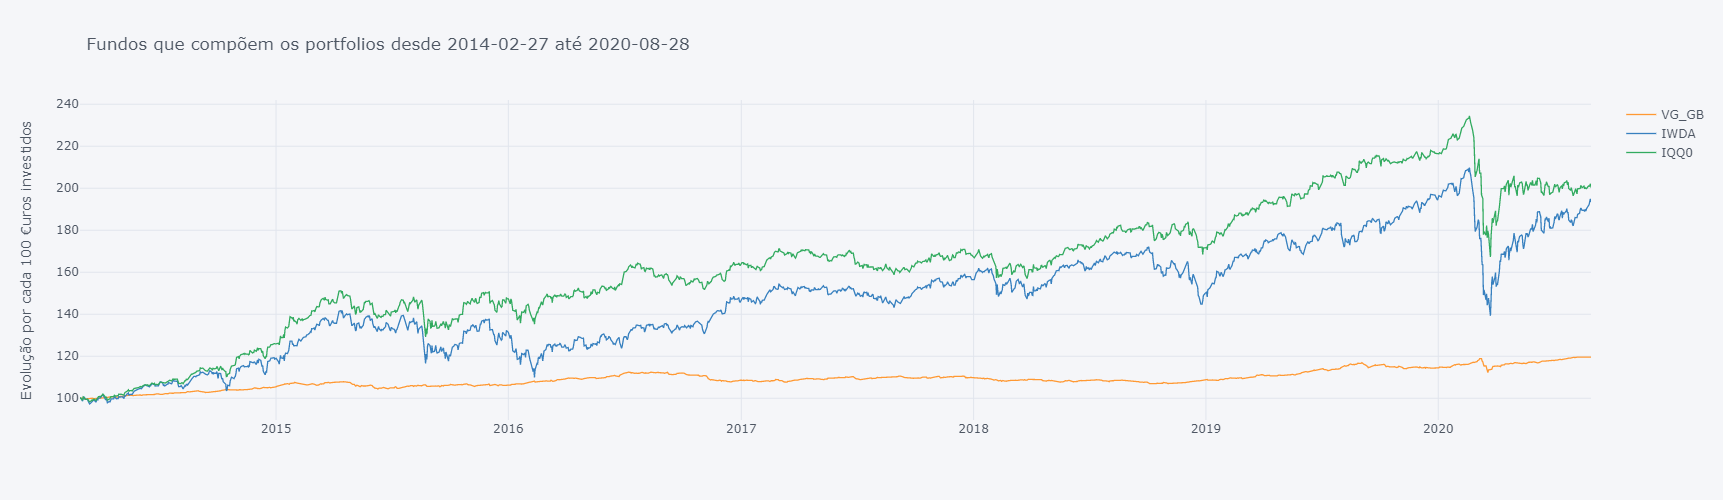

In [4]:
fundos.iplot(dimensions=pa.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

In [5]:
nr = 0

pa.print_title('Quadro de performance de ' + fundos.columns[nr])
pa.compute_ms_performance_table(fundos[[fundos.columns[nr]]])

**Quadro de performance de VG_GB**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,2.79%,19.62%,2.64%,1.06,-5.57%,0.50
YTD,N/A,4.73%,4.06%,1.78,-5.57%,1.30
1 Year,2.47%,2.48%,3.78%,0.65,-5.57%,0.44
3 Years,2.78%,8.57%,2.90%,0.96,-5.57%,0.50
5 Years,2.51%,13.20%,2.73%,0.92,-5.57%,0.45


In [6]:
nr = 1

pa.print_title('Quadro de performance de ' + fundos.columns[nr])
pa.compute_ms_performance_table(fundos[[fundos.columns[nr]]])

**Quadro de performance de IWDA**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,10.68%,93.45%,16.66%,0.64,-33.63%,0.32
YTD,N/A,-0.48%,29.58%,-0.02,-33.63%,-0.02
1 Year,10.00%,10.05%,24.87%,0.40,-33.63%,0.30
3 Years,10.26%,34.09%,17.68%,0.58,-33.63%,0.31
5 Years,8.93%,53.45%,16.86%,0.53,-33.63%,0.27


In [7]:
nr = 2

pa.print_title('Quadro de performance de ' + fundos.columns[nr])
pa.compute_ms_performance_table(fundos[[fundos.columns[nr]]])

**Quadro de performance de IQQ0**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,11.28%,100.32%,13.74%,0.82,-28.65%,0.39
YTD,N/A,-7.47%,25.01%,-0.44,-28.65%,-0.39
1 Year,-4.03%,-4.05%,20.95%,-0.19,-28.65%,-0.14
3 Years,7.86%,25.51%,14.63%,0.54,-28.65%,0.27
5 Years,7.77%,45.41%,13.70%,0.57,-28.65%,0.27


In [8]:
conservador = pa.compute_portfolio(fundos, [0.7, 0.15, 0.15])
moderado = pa.compute_portfolio(fundos, [0.5, 0.25, 0.25])
agressivo = pa.compute_portfolio(fundos, [0.2, 0.4, 0.4])

portfolios = pa.merge_time_series(conservador, moderado)
portfolios = pa.merge_time_series(portfolios, agressivo)

portfolios.columns = ['Cons.', 'Mod.', 'Agr.'] 

### Portfolios:

- Portfolio Conservador:
    - 15% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 15% IQQ0/MVol (MSCI World Min Vol) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 70% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    
    
- Portfolio Moderado:
    - 25% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 25% IQQ0/MVol (MSCI World Min Vol) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 50% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)
    
    
- Portfolio Agressivo:
    - 40% IWDA (MSCI World) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 40% IQQ0/MVol (MSCI World Min Vol) - [Homepage](https://www.ishares.com/nl/particuliere-belegger/nl/producten/251882/ishares-msci-world-ucits-etf-acc-fund) (tem de se traduzir para inglês usando a funcionalidade "translate to english" do chrome)
    - 20% Vanguard Global Bond - [Homepage](https://global.vanguard.com/portal/site/kiids/pt/pt/documents) // [Kiid](https://global.vanguard.com/portal/site/loadPDF?country=pt&docId=10417)

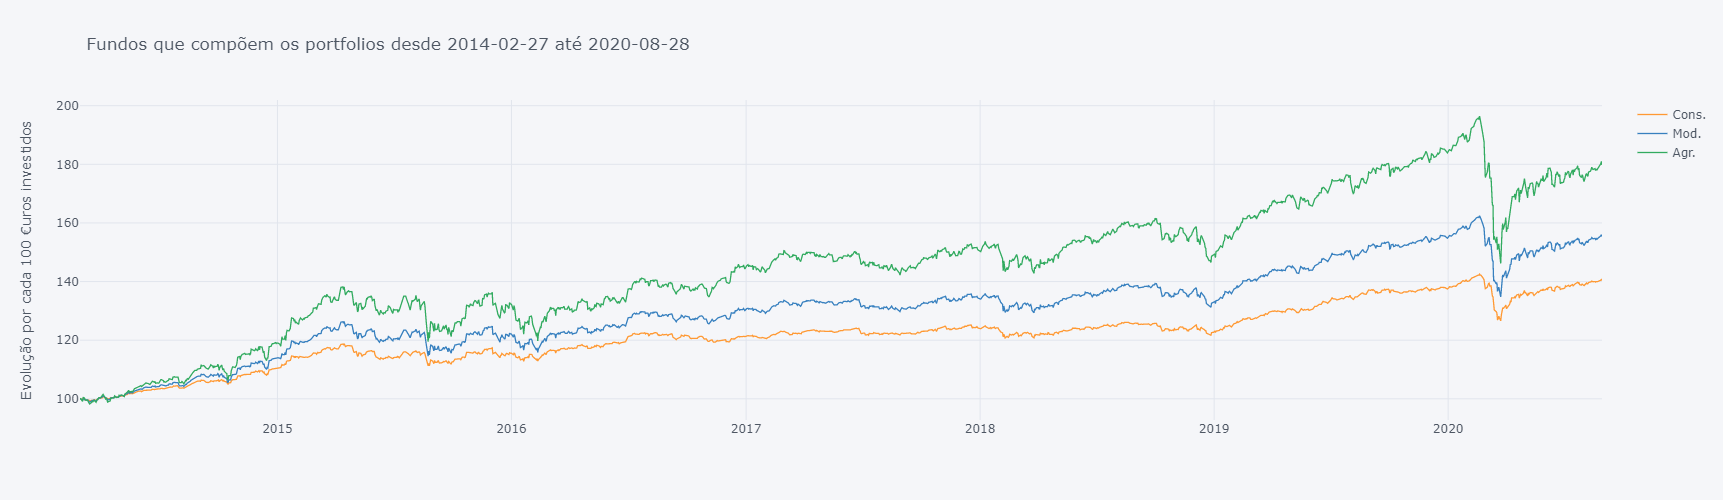

In [9]:
portfolios.iplot(dimensions=pa.dimensions, title='Fundos que compõem os portfolios desde ' +  Begin + ' até ' + End,
             yTitle='Evolução por cada 100 €uros investidos')

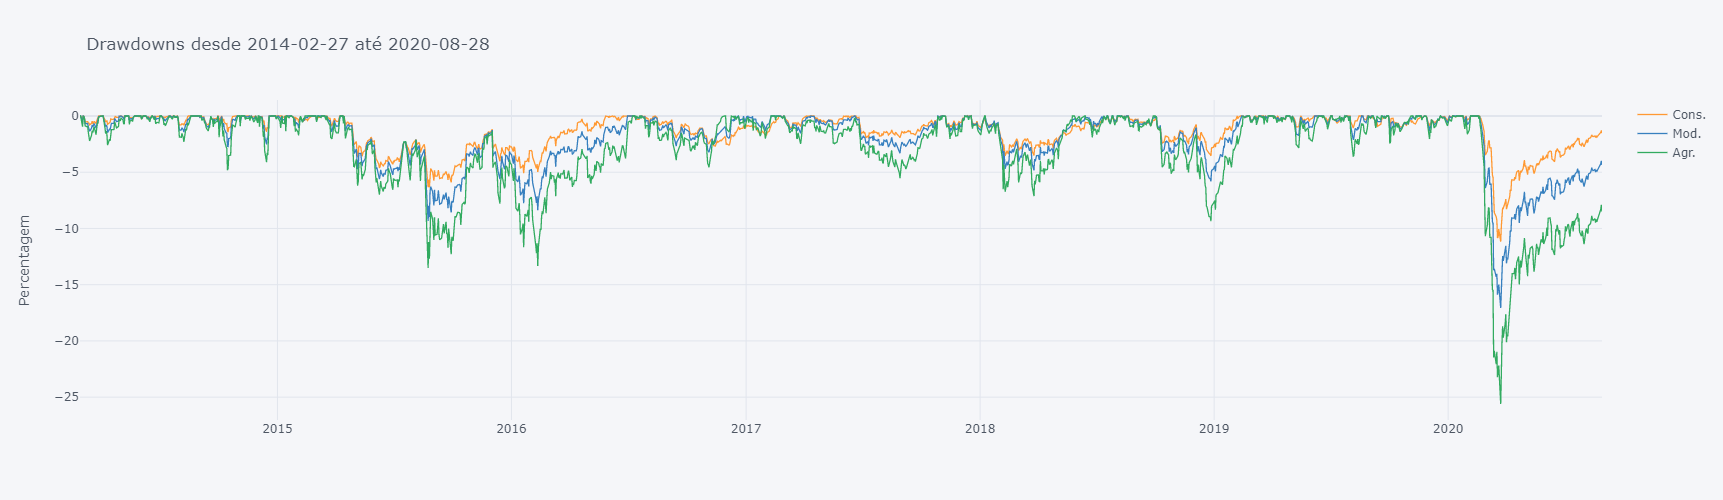

In [10]:
round(pa.compute_drawdowns(portfolios), 2).iplot(dimensions=pa.dimensions, title='Drawdowns desde ' +  Begin + ' até ' + End, yTitle='Percentagem')

In [11]:
pa.print_title('Quadro de performance do portfolio Conservador (70B/30E)')
pa.compute_ms_performance_table(portfolios[['Cons.']])

**Quadro de performance do portfolio Conservador (70B/30E)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,5.35%,40.35%,4.62%,1.16,-11.18%,0.48
YTD,N/A,2.11%,7.76%,0.41,-11.18%,0.29
1 Year,2.94%,2.96%,6.61%,0.45,-11.18%,0.26
3 Years,4.81%,15.14%,4.88%,0.98,-11.18%,0.43
5 Years,4.38%,23.92%,4.60%,0.95,-11.18%,0.39


In [12]:
pa.print_title('Quadro de performance do portfolio Moderado (50B/50E)')
pa.compute_ms_performance_table(portfolios[['Mod.']])

**Quadro de performance do portfolio Moderado (50B/50E)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,7.01%,55.38%,7.35%,0.95,-17.06%,0.41
YTD,N/A,0.37%,12.60%,0.04,-17.06%,0.03
1 Year,3.08%,3.09%,10.62%,0.29,-17.06%,0.18
3 Years,6.10%,19.45%,7.68%,0.79,-17.06%,0.36
5 Years,5.57%,31.18%,7.29%,0.76,-17.06%,0.33


In [13]:
pa.print_title('Quadro de performance do portfolio Agressivo (20B/80E)')
pa.compute_ms_performance_table(portfolios[['Agr.']])

**Quadro de performance do portfolio Agressivo (20B/80E)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
S.I.,9.44%,79.78%,11.77%,0.80,-25.61%,0.37
YTD,N/A,-2.24%,20.88%,-0.16,-25.61%,-0.13
1 Year,3.01%,3.03%,17.51%,0.17,-25.61%,0.12
3 Years,7.94%,25.78%,12.37%,0.64,-25.61%,0.31
5 Years,7.29%,42.21%,11.74%,0.62,-25.61%,0.28


**Quadro de retornos anuais dos portfolios**

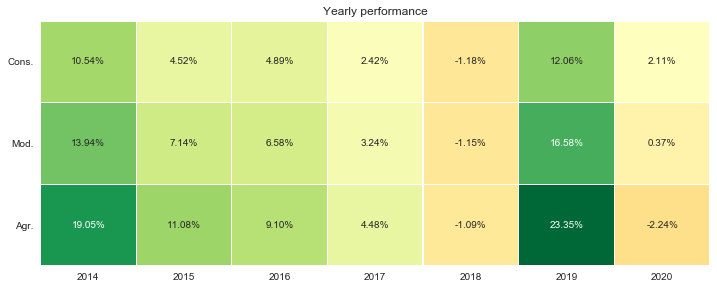

In [14]:
pa.print_title('Quadro de retornos anuais dos portfolios')
fundos_norm = portfolios.copy()

# Resampling to yearly (business year)
yearly_quotes_fundos = fundos_norm.resample('BA').last()

# Adding first quote (only if start is in the middle of the year) ### Falta trabalho para automatizar #####
yearly_quotes_fundos = pd.concat([yearly_quotes_fundos.iloc[:1], yearly_quotes_fundos])
yearly_quotes_fundos = pd.concat([pd.DataFrame(fundos_norm.iloc[0]).transpose(), yearly_quotes_fundos.iloc[1:]])

# Returns
yearly_returns_fundos = ((yearly_quotes_fundos / yearly_quotes_fundos.shift(1)) - 1) * 100
yearly_returns_fundos = yearly_returns_fundos.set_index([list(range(fundos_norm.index[0].year - 1, fundos_norm.index[-1].year + 1))]).drop(fundos_norm.index[0].year - 1)

# Calcular em valores percentuais
yearly_returns_fundos = yearly_returns_fundos / 100

# Sns heatmap
fig, ax = plt.subplots()
fig.set_size_inches(12, 4.5)

ax = sns.heatmap(yearly_returns_fundos.transpose(), annot=True, cmap="RdYlGn", linewidths=.2, cbar=False, center=0.02, fmt='.2%')
plt.yticks(rotation=360)
plt.title('Yearly performance')
plt.show()

### Curva eficiente de Markowitz

Para ajustar os pesos ao risco (ajuste ao retorno por esta via é mais instável mas é sempre possibilidade também) que se pretende se quisermos ir mais longe na personalização. Os fundos/ETFs considerados para a optimização são o IWDA (representando global Equity) e Vanguard Global Bonds (representando Global Bonds). As carteiras acima estão construídas dividindo a parte Equity 50% em IWDA e 50% IQQ0.

In [15]:
from scipy.optimize import minimize as sp_minimize

# Helper function
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

def optimal_weights(n_points, cagr_returns,covmat):
    """
    """
    target_rs = np.linspace(cagr_returns.min(), cagr_returns.max(), n_points)
    weights = [minimize_vol(target_return, cagr_returns,covmat) for target_return in target_rs]
    return weights

def compute_ef(n_points, cagr_returns,covmat):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, cagr_returns,covmat)
    rets = [portfolio_return(w, cagr_returns) for w in weights]
    vols = [portfolio_vol(w, covmat) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef, weights

def minimize_vol(target_return, cagr_returns, covmat):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = cagr_returns.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (cagr_returns,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,cagr_returns)
    }
    # minimum_weight_group = {'type': 'ineq',
    #                         'fun': lambda weights: np.sum([weights[4], weights[5]]) - 0.1
    # }

    if len(covmat) == 2:
        constraints = (weights_sum_to_1, return_is_target,
                        minimum_weight_0, minimum_weight_1)

    if len(covmat) == 3:
        constraints = (weights_sum_to_1, return_is_target,
                        minimum_weight_0, minimum_weight_1,
                        minimum_weight_2)

    if len(covmat) == 4:
        constraints = (weights_sum_to_1, return_is_target,
                        minimum_weight_0, minimum_weight_1,
                        minimum_weight_2, minimum_weight_3)

    elif len(covmat) == 5:
        constraints = (weights_sum_to_1, return_is_target,
                        minimum_weight_0, minimum_weight_1,
                        minimum_weight_2, minimum_weight_3,
                        minimum_weight_4)

    elif len(covmat) == 6:
        constraints = (weights_sum_to_1, return_is_target,
                        minimum_weight_0, minimum_weight_1,
                        minimum_weight_2, minimum_weight_3,
                        minimum_weight_4, minimum_weight_5)

    weights = sp_minimize(portfolio_vol, init_guess,
                        args=(covmat,), method='SLSQP',
                        options={'disp': False},
                        constraints=constraints,
                        bounds=bounds)
    return weights.x

def compute_efficient_frontier(quotes, min_weights, nomes):
    cagr_returns = pa.compute_cagr(quotes)
    cagr_returns

    returns = quotes.pct_change().dropna()
    returns

    returns_covmat = returns.cov()
    returns_covmat_a = returns_covmat * 365

    def ef_minimum_weight(ticker_number, min_weight):
        globals()['minimum_weight_' + str(ticker_number)] = {'type': 'ineq',
                    'fun': lambda weights: weights[ticker_number] - min_weight
        }

    for i in range(len(returns.columns)):
        ef_minimum_weight(ticker_number=i, min_weight=min_weights[i])

    ef, weights = compute_ef(100, cagr_returns,returns_covmat_a)

    weights_100 = np.array(weights) * 100

    columns = ['Returns', 'Volatility'] + nomes + ['Sharpe']

    ef_2 = pd.concat([ef, pd.DataFrame(weights_100)], axis=1)
    ef_2['Volatility'] = ef_2['Volatility'] * 100
    ef_2['Sharpe'] = ef_2['Returns'] / ef_2['Volatility']
    ef_2.columns=columns
    ef_2 = round(ef_2, 4)

    return ef_2

In [16]:
nomes = ['VG', 'IWDA']
ef = compute_efficient_frontier(fundos[['VG_GB', 'IWDA']], [0, 0], nomes)

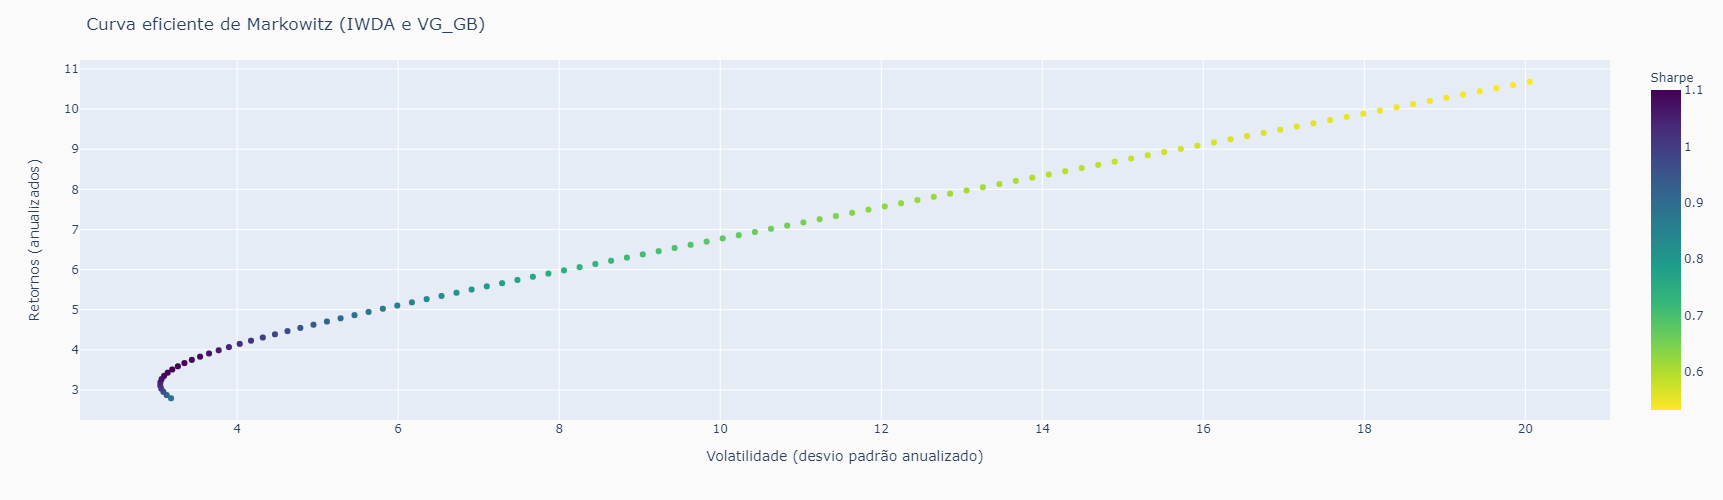

In [17]:
import plotly.express as px

fig = px.scatter(ef, x="Volatility", y="Returns", color='Sharpe',
            color_continuous_scale='Viridis_r',
            hover_data=nomes, width=990, height=500)

fig.update_layout(
    paper_bgcolor="rgb(250,250,250)",
    title='Curva eficiente de Markowitz (IWDA e VG_GB)',
    yaxis=dict(
        title_text="Retornos (anualizados)"),
    xaxis=dict(
        title_text="Volatilidade (desvio padrão anualizado)")
)

### Questão: Posso usar o AGGH/EUNA (iShares Core Global Aggregate Bond UCITS ETF) em vez do Vanguard Global bond index fund (IE00BGCZ0933)?

In [18]:
ISINs = ['IE00B18GC888', 'AGGH_oficial']
Nomes = ['VG_GB', 'AGGH']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()
fundos = pa.normalize(fundos.loc[:'2020-04-30'])

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

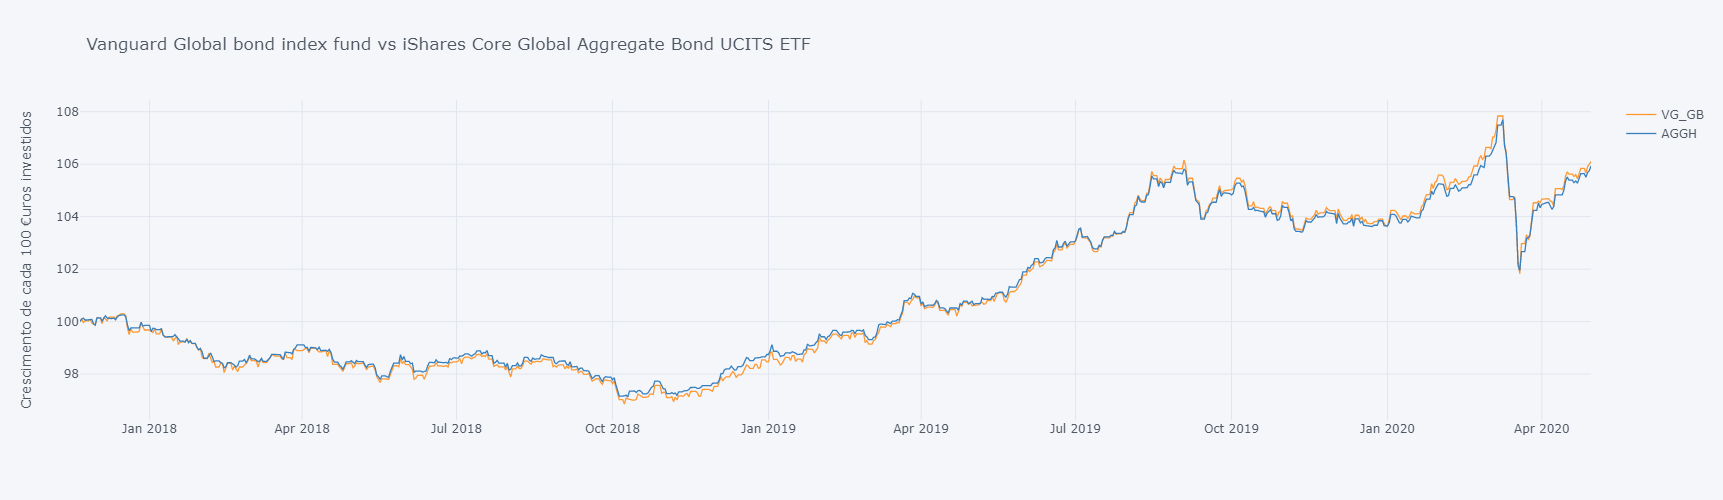

In [19]:
fundos.iplot(dimensions=pa.dimensions, title = 'Vanguard Global bond index fund vs iShares Core Global Aggregate Bond UCITS ETF',
            yTitle='Crescimento de cada 100 €uros investidos')

Os activos parecem ser suficientemente semelhantes para se poder usar qualquer um deles.

## Comparação do Vanguard Global Bond com o Xtrackers II Global Government Bond UCITS ETF 1C - EUR Hedged

In [20]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers =  ['DBZB.XETRA']

ETFs = pd.DataFrame()

# Download
for ticker in Tickers:
    url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
    ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
    ETFs = ETFs.merge(ETF, left_index = True, right_index = True, how='outer')
    
ETFs.columns = Tickers
ETFs = ETFs.fillna(method='ffill')
ETFs = ETFs.replace(to_replace=0, method='ffill')
ETFs.columns = ['DBZB']

In [21]:
ISINs = ['IE00B18GC888']
Nomes = ['VG_GB']

fundos = pd.read_csv('C:/Users/Luis/Google Drive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col = 'Date', parse_dates = True)[ISINs]

fundos.columns = Nomes
fundos = fundos.dropna()

Begin = str(fundos.iloc[0].name)[0:10]
End = str(fundos.iloc[-1].name)[0:10]

fundos = pa.merge_time_series(ETFs, fundos, how='inner')
fundos = pa.normalize(fundos)

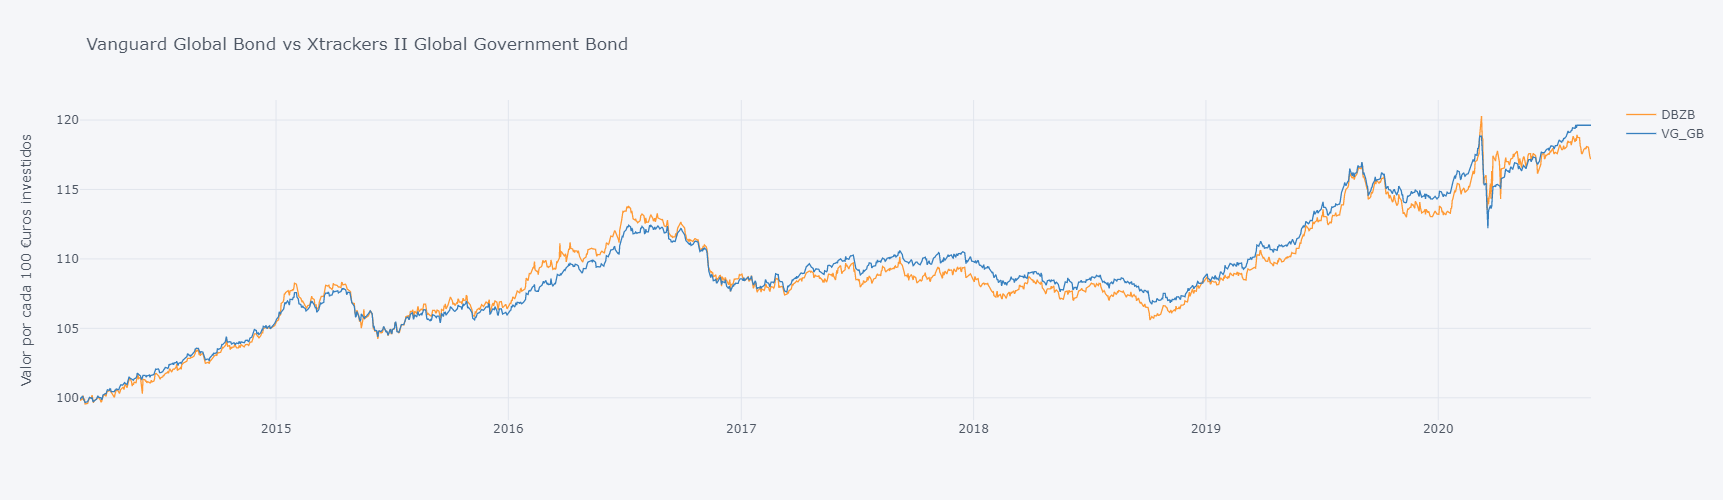

In [22]:
fundos.iplot(dimensions=pa.dimensions,
             title= 'Vanguard Global Bond vs Xtrackers II Global Government Bond',
             yTitle='Valor por cada 100 €uros investidos')

Tal como na comparação anterior os activos parecem ser suficientemente semelhantes para se poder usar qualquer um deles. Embora, ao contrário dos anteriores, devido ao benchmark não ser o mesmo, a probabilidade de haver desvios no futuro é maior. Pode-se ver isso pelo tracking error ser maior nesta segunda comparação. Tracking error é simplesmente haver um spread maior entre eles. Quanto mais um activo se sobrepõe ao outro menor o tracking error.

In [23]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF